In [2]:
import numpy as np
import matplotlib.pyplot as plt
from medpy.filter.smoothing import anisotropic_diffusion


In [4]:
intensities = np.load('/Users/cadenmyers/billingelab/dev/skyrmion_lattices/experimental_data/npz_field_sweep_old/Field_29mT.npz')['data']
print(intensities.shape)
image = intensities[0]

(20, 128, 128)


In [5]:
def normalize_min_max(array):
    array_min = np.min(array)
    array_max = np.max(array)
    return (array - array_min) / (array_max - array_min)

### FFT filtering

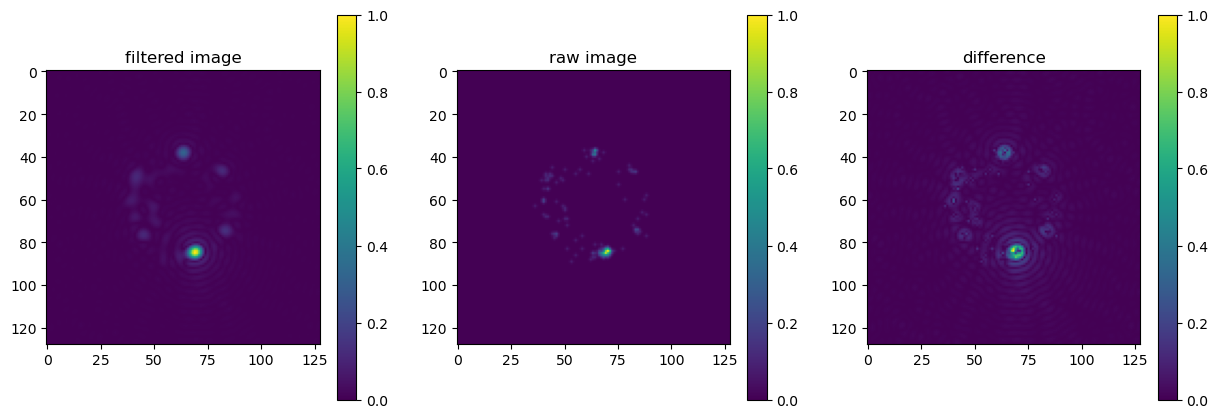

In [70]:

fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)

magnitude_spectrum = np.log(np.abs(fft_shifted))

# create filter in freq space
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2 # center

mask = np.zeros((rows, cols), np.uint8)
r = 20
center = [crow, ccol]
for i in range(rows):
    for j in range(cols):
        if np.sqrt((i - center[0])**2 + (j - center[1])**2) <= r:
            mask[i,j] = 1

fft_filtered = fft_shifted * mask
fft_inverse_shifted = np.fft.ifftshift(fft_filtered)

filtered_image = np.fft.ifft2(fft_inverse_shifted)
filtered_image = normalize_min_max(np.abs(filtered_image))

# Display the filtered image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

im0 = ax[0].imshow(filtered_image, label='filtered image')
ax[0].set_title('filtered image')
fig.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(normalize_min_max(image))
ax[1].set_title('raw image')
fig.colorbar(im1, ax=ax[1])

im2 = ax[2].imshow(normalize_min_max((np.abs(filtered_image-normalize_min_max(image)))))
ax[2].set_title('difference')
fig.colorbar(im2, ax=ax[2])
plt.show()



### Anisotropic diffusion filtering

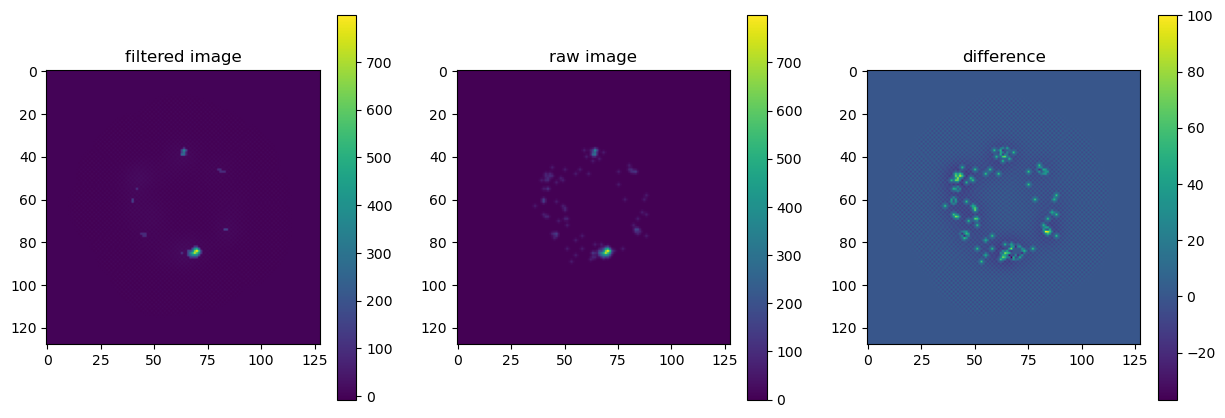

In [28]:
# Parameters:
#   iterations: Number of iterations to run the diffusion process.
#   kappa: Threshold for edge stopping (higher means less edge detection).
#   gamma: Step size (controls diffusion speed).
filtered_image = anisotropic_diffusion(image, niter=50, kappa=30, gamma=.31)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

im0 = ax[0].imshow(filtered_image)
ax[0].set_title('filtered image')
fig.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(image)
ax[1].set_title('raw image')
fig.colorbar(im1, ax=ax[1])

im2 = ax[2].imshow(image-filtered_image)
ax[2].set_title('difference')
fig.colorbar(im2, ax=ax[2])
plt.show()